In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

In [3]:
# Import the data

lending_data = pd.read_csv("./Resources/lending_data.csv")
lending_data.tail()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


Best Model Prediction:  I believe RandomForestClassifier is the best model predictor because the dataset has multiple features that can help determine the credit risk on the loan and this model is designed to find the most important features for predicting outcomes, in the this case classifying risk level.

In [4]:
X = lending_data.drop('loan_status', axis=1)
y = lending_data['loan_status']

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from matplotlib import pyplot as plt

In [6]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')


Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


In [8]:
feature_importances = clf.feature_importances_

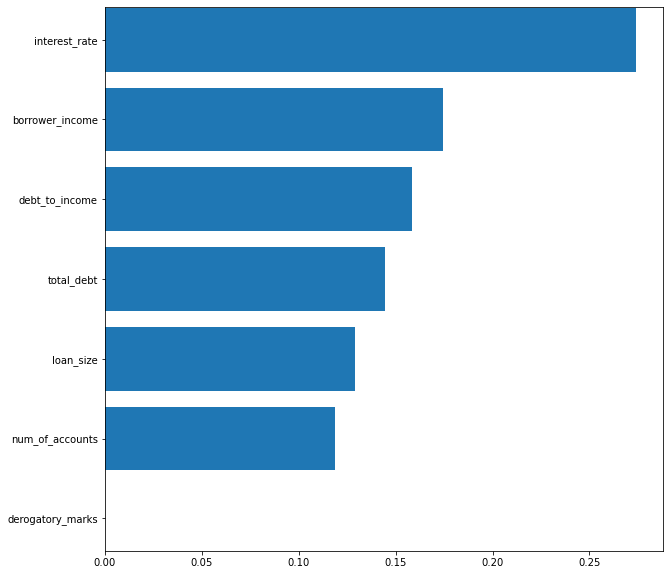

In [11]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [12]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=1))

In [14]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [15]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


In [16]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


Results:  The LogisticRegression Model performed better with a testing score of .993 vs the RandomForestModel test score of .991 which was the opposite of my predicion. The LogisticRegression Model works best with a binary outcome, which is how the loan status was featured.  However, it was interesting to note that the interest rate was the biggest factor in determining the loan risk, not borrower income or current debt to income ratio. 